In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix,classification_report,roc_auc_score, roc_curve,accuracy_score,precision_score,recall_score, f1_score)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle
import scipy.stats as stats
import json


In [31]:
RANDOM_STATE = 42

In [32]:
df=pd.read_csv(r"D:\MUFG\heart_disease_dataset.csv")


In [33]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49,1,1,133,178,0,1,164,0,2.5,1,0,3,1
396,38,1,3,111,126,1,1,170,0,0.7,1,0,2,1
397,66,1,1,136,205,0,1,127,1,1.0,1,0,2,1
398,52,1,3,144,208,1,1,131,0,0.3,1,0,0,1


In [34]:
print('Dataset shape:', df.shape)


Dataset shape: (400, 14)


In [35]:
print(df.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')


In [36]:
print(df.describe())


              age         sex  chest_pain_type  resting_blood_pressure  \
count  400.000000  400.000000       400.000000              400.000000   
mean    53.667500    0.662500         1.712500              123.630000   
std      8.508403    0.473449         1.035628               16.567114   
min     29.000000    0.000000         0.000000               94.000000   
25%     48.000000    0.000000         1.000000              112.000000   
50%     54.000000    1.000000         2.000000              124.000000   
75%     59.000000    1.000000         3.000000              135.000000   
max     77.000000    1.000000         3.000000              174.000000   

       cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count   400.000000           400.000000   400.000000      400.000000   
mean    216.627500             0.140000     0.530000      146.717500   
std      41.379941             0.347422     0.533678       21.104293   
min     126.000000             0.000000     0

In [37]:
print(df['heart_disease'].value_counts())

heart_disease
1    222
0    178
Name: count, dtype: int64


In [38]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64

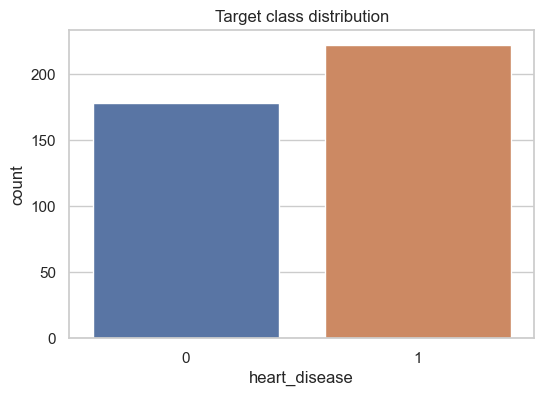

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='heart_disease', data=df)
plt.title('Target class distribution')
plt.show()

                              age       sex  chest_pain_type  \
age                      1.000000  0.014380        -0.000352   
sex                      0.014380  1.000000         0.118523   
chest_pain_type         -0.000352  0.118523         1.000000   
resting_blood_pressure   0.448586  0.001294        -0.032509   
cholesterol              0.278771  0.156035         0.068962   
fasting_blood_sugar     -0.024062  0.013713         0.007662   
resting_ecg             -0.000281  0.064970         0.049654   
max_heart_rate          -0.372758 -0.095100        -0.029756   
exercise_induced_angina  0.046500 -0.017578         0.035266   
st_depression           -0.034691  0.171162        -0.014017   
st_slope                -0.033477  0.106257         0.046515   
num_major_vessels        0.064641 -0.062741        -0.013848   
thalassemia             -0.064915  0.014393         0.029390   
heart_disease            0.341464  0.169419         0.135328   

                         resting_blood_

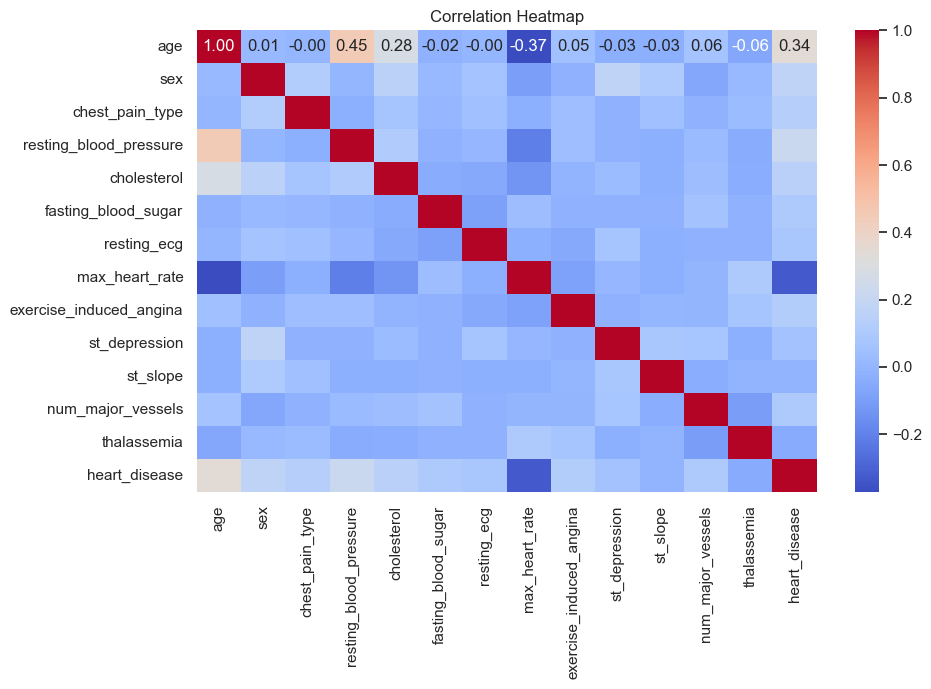

In [40]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [41]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [43]:
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (320, 13) Test shape: (80, 13)


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
def evaluate_model(model, X_train, X_test, y_train, y_test, scaled=False):
    if scaled:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        try:
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        except:
            y_pred_proba = model.decision_function(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        except:
            y_pred_proba = model.decision_function(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    metrics = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4),
        "Specificity": round(specificity, 4),
        "ROC-AUC": round(roc_auc_score(y_test, y_pred_proba), 4)
    }
    return metrics

In [46]:
results = {}

In [47]:
results["Logistic Regression"] = evaluate_model(
    LogisticRegression(max_iter=1000, random_state=42),
    X_train, X_test, y_train, y_test, scaled=True
)

results["Decision Tree"] = evaluate_model(
    DecisionTreeClassifier(random_state=42),
    X_train, X_test, y_train, y_test
)

results["Random Forest"] = evaluate_model(
    RandomForestClassifier(random_state=42),
    X_train, X_test, y_train, y_test
)

results["Support Vector Machine"] = evaluate_model(
    SVC(kernel='linear', probability=True, random_state=42),
    X_train, X_test, y_train, y_test, scaled=True
)

In [48]:
results_df = pd.DataFrame(results).T
print("\n=== Model Performance Comparison ===\n")
print(results_df)


=== Model Performance Comparison ===

                        Accuracy  Precision  Recall  F1 Score  Specificity  \
Logistic Regression       0.6750     0.6957  0.7273    0.7111       0.6111   
Decision Tree             0.5750     0.6000  0.6818    0.6383       0.4444   
Random Forest             0.6625     0.6735  0.7500    0.7097       0.5556   
Support Vector Machine    0.6625     0.6977  0.6818    0.6897       0.6389   

                        ROC-AUC  
Logistic Regression      0.7342  
Decision Tree            0.5631  
Random Forest            0.7601  
Support Vector Machine   0.7443  


<Figure size 1000x600 with 0 Axes>

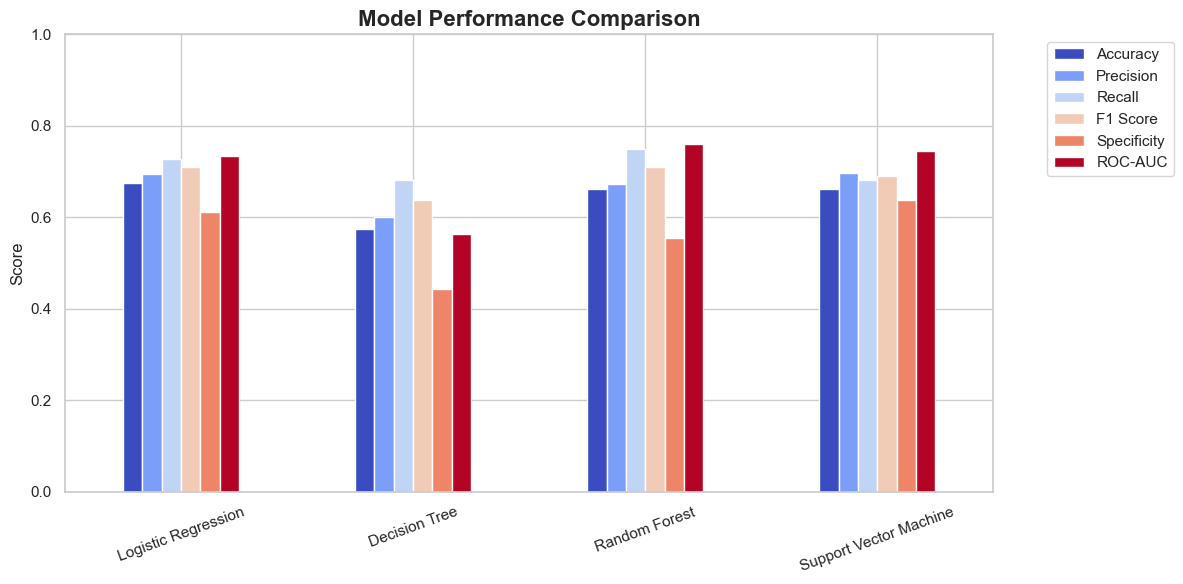

In [49]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

results_df.plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
best_model = results_df["F1 Score"].idxmax()
print(f"\n The best performing model is **{best_model}**, based on the highest F1 Score and balanced ROC-AUC & Specificity.")


 The best performing model is **Logistic Regression**, based on the highest F1 Score and balanced ROC-AUC & Specificity.


In [52]:
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save model, scaler, and features
import pickle, json

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("feature_columns.json", "w") as f:
    json.dump(X.columns.tolist(), f)

print("✅ Best model, scaler, and feature columns saved successfully!")


✅ Best model, scaler, and feature columns saved successfully!
